In [27]:
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler, LabelBinarizer

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [3]:
def get_data():
    """Returns the data as a pandas dataframe"""
    try:
        df = pd.read_csv('training_data/sign_mnist_train.csv')
    except:
        df = pd.read_csv(r'HandsignInterpreter\training_data\sign_mnist_train.csv')
    return df

def get_test_data():
    """Returns the data as a pandas dataframe"""
    try:
        df = pd.read_csv('training_data/sign_mnist_test.csv')
    except:
        df = pd.read_csv(r'HandsignInterpreter\training_data\sign_mnist_test.csv')
    return df

In [24]:
df = get_data()
df_test = get_test_data()
classes_train = df['label']
classes_test = df_test['label']
del df['label']
del df_test['label']

label_binarizer = LabelBinarizer()
classes_train = label_binarizer.fit_transform(classes_train)
classes_test = label_binarizer.fit_transform(classes_test)

vector_train = df.values
vector_test = df_test.values
vector_train = vector_train / 255
vector_test = vector_test / 255
vector_train = vector_train.reshape(-1, 28, 28, 1)
vector_test = vector_test.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(vector_train)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(vector_train, classes_train, batch_size = 128), epochs = 20, validation_data = (vector_test, classes_test), callbacks = [learning_rate_reduction])
print("Accuracy of the model is - " , model.evaluate(vector_test, classes_test)[1]*100 , "%")    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

In [30]:
tf.keras.models.save_model(model, 'CNN_model')
print('Model saved')

INFO:tensorflow:Assets written to: CNN_model/assets


INFO:tensorflow:Assets written to: CNN_model/assets


Model saved


In [31]:
model.save('cnn_model.h5')
print('Model Saved!')
# save model
#model.save_weights('cnn_model-weights.h5')
#print('Weights Saved!')

Model Saved!


In [33]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [36]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

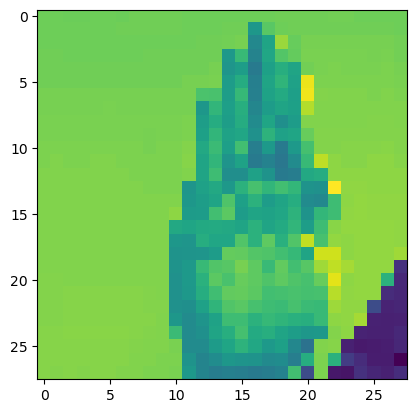

In [122]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('hand.png')
plt.imshow(img)
plt.show()

In [130]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
print('Array',img_array.shape,'Batch',img_batch.shape)
img.shape

Array (28, 28, 1) Batch (1, 28, 28, 1)


(28, 28)

In [131]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
img_preprocessed = preprocess_input(img_batch)

IndexError: index 1 is out of bounds for axis 3 with size 1

In [124]:
model = keras.models.load_model("my_model")

In [125]:
prediction = model.predict(img_batch)

1/1 [==============================] - 0s 97ms/step


In [126]:
prediction

array([[8.8276532e-11, 9.9873835e-01, 4.0645501e-13, 5.4525546e-13,
        1.7356113e-07, 1.6505304e-08, 9.9790072e-12, 3.7996553e-10,
        8.4454911e-08, 9.1597832e-12, 1.1784079e-10, 1.4691570e-09,
        1.5091898e-07, 3.1238926e-12, 8.2114955e-09, 2.4326280e-10,
        1.4681283e-10, 1.6006682e-11, 7.7292214e-11, 1.2611990e-03,
        5.5791427e-10, 2.7145770e-08, 1.4802788e-09, 1.2680879e-09]],
      dtype=float32)

In [133]:
print(decode_predictions(prediction)[0])

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 24)

In [165]:
pred = list(prediction[0])
for num in pred:
    num = num.item()
sorted_pred = sorted(pred, reverse=True)
print(sorted_pred)
print(pred)
index = pred.index(sorted_pred[0])
index

[0.99873835, 0.001261199, 1.7356113e-07, 1.5091898e-07, 8.445491e-08, 2.714577e-08, 1.6505304e-08, 8.2114955e-09, 1.4802788e-09, 1.469157e-09, 1.2680879e-09, 5.5791427e-10, 3.7996553e-10, 2.432628e-10, 1.4681283e-10, 1.1784079e-10, 8.827653e-11, 7.7292214e-11, 1.6006682e-11, 9.979007e-12, 9.159783e-12, 3.1238926e-12, 5.4525546e-13, 4.06455e-13]
[8.827653e-11, 0.99873835, 4.06455e-13, 5.4525546e-13, 1.7356113e-07, 1.6505304e-08, 9.979007e-12, 3.7996553e-10, 8.445491e-08, 9.159783e-12, 1.1784079e-10, 1.469157e-09, 1.5091898e-07, 3.1238926e-12, 8.2114955e-09, 2.432628e-10, 1.4681283e-10, 1.6006682e-11, 7.7292214e-11, 0.001261199, 5.5791427e-10, 2.714577e-08, 1.4802788e-09, 1.2680879e-09]


1